In [1]:
pip install ndlib 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 5.4 MB/s 
     |████████████████████████████████| 3.1 MB 43.8 MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.9.11-py3-none-any.whl size=9074 sha256=e10c78c445ee3f3ed632f5a6683f3dc37e69a490e9284c9097d1a0b859953e43
  Stored in directory: /root/.cache/pip/wheels/7d/e4/0c/0c83f70bd0b99ce8aea47a21f8e52502169e7dd17808d12f30
Successfully built python-igraph


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import pandas as pd
import networkx as nx
from sklearn.cluster import KMeans
import numpy as np 
from math import *

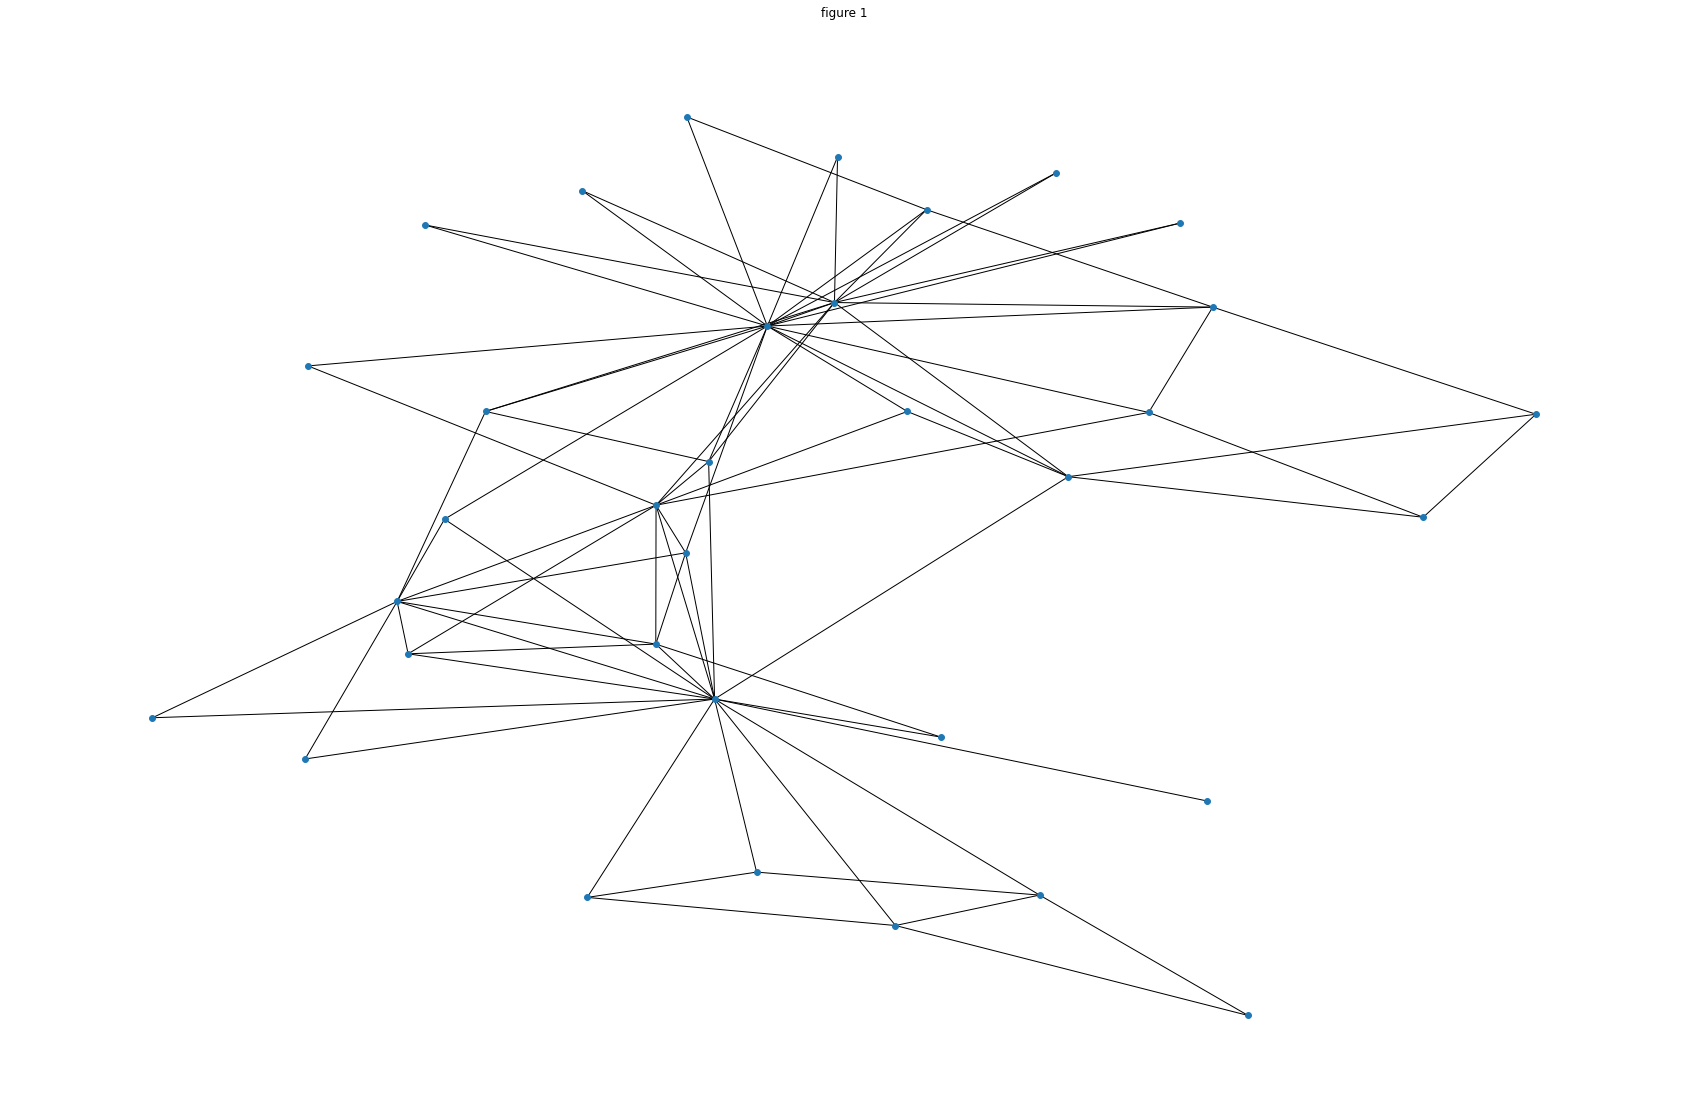

In [4]:
plt.figure(figsize=(30,20))
G=nx.read_edgelist('karate.txt',create_using=nx.Graph(),nodetype=int)
sp=nx.spring_layout(G)

nx.draw_networkx(G,pos=sp,with_labels=False,node_size=35)
plt.title('figure 1')

plt.axis('off')

plt.show()

In [5]:
def TOPSIS(G1):
    betCent = nx.betweenness_centrality(G1)
    closCent = nx.closeness_centrality(G1)
    degCent = nx.degree_centrality(G1)
    eigCent = nx.eigenvector_centrality(G1)

   

    BC = []
    DC = []
    EC = []
    CC = []

    for i in sorted(betCent):
        BC.append(betCent[i])

    for i in sorted(closCent):
        CC.append(closCent[i])

    for i in sorted(degCent):
        DC.append(degCent[i])

    for i in sorted(eigCent):
        EC.append(eigCent[i])

    
    mat = pd.DataFrame({'DC' : DC,
                        'CC' : CC,
                        'BC' : BC,
                        'EC' : EC})


    DC_denom = sqrt((mat['DC']**2).sum())
    CC_denom = sqrt((mat['CC']**2).sum())
    BC_denom = sqrt((mat['BC']**2).sum())
    EC_denom = sqrt((mat['EC']**2).sum())



    mat_norm = pd.DataFrame({
        'DC' : mat['DC'] / DC_denom,
        'CC' : mat['CC'] / CC_denom,
        'BC' : mat['BC'] / BC_denom,
        'EC' : mat['EC'] / EC_denom,
    })

    

    mat_norm_weighted = mat_norm

    mat_norm_weighted['DC'] = mat_norm_weighted['DC'] * 0.2
    mat_norm_weighted['EC'] = mat_norm_weighted['EC'] * 0.2
    mat_norm_weighted['BC'] = mat_norm_weighted['BC'] * 0.3
    mat_norm_weighted['CC'] = mat_norm_weighted['CC'] * 0.3


    DC_ideal_best = mat_norm_weighted['DC'].max()
    DC_ideal_worst = mat_norm_weighted['DC'].min()

    CC_ideal_best = mat_norm_weighted['CC'].max()
    CC_ideal_worst = mat_norm_weighted['CC'].min()

    BC_ideal_best = mat_norm_weighted['BC'].max()
    BC_ideal_worst = mat_norm_weighted['BC'].min()

    EC_ideal_best = mat_norm_weighted['EC'].max()
    EC_ideal_worst = mat_norm_weighted['EC'].min()


    mat_norm_weighted["from_best"] = (mat_norm_weighted["DC"] - DC_ideal_best)**2 + (mat_norm_weighted['CC'] - CC_ideal_best)**2 + (mat_norm_weighted['BC'] - BC_ideal_best)**2 + (mat_norm_weighted['EC'] - EC_ideal_best)**2
    mat_norm_weighted["from_worst"] = (mat_norm_weighted["DC"] - DC_ideal_worst)**2 + (mat_norm_weighted['CC'] - CC_ideal_worst)**2 + (mat_norm_weighted['BC'] - BC_ideal_worst)**2 + (mat_norm_weighted['EC'] - EC_ideal_worst)**2


    mat_norm_weighted["from_best"] = mat_norm_weighted["from_best"].apply(lambda x : sqrt(x))
    mat_norm_weighted["from_worst"] = mat_norm_weighted["from_worst"].apply(lambda x : sqrt(x))

 

    mat_norm_weighted['ratio'] = mat_norm_weighted['from_worst'] / (mat_norm_weighted['from_worst'] + mat_norm_weighted['from_best'])

   

    result = mat

    result['TOPSIS'] = mat_norm_weighted['ratio']
    result.sort_values(by="TOPSIS", ascending=False ,inplace=True)

    result.reset_index(inplace=True)

    result.rename(columns={"index" : "node"}, inplace=True)

    #

    return result

In [6]:
data=TOPSIS(G)
data.to_csv("TOPSIS_karate_result.csv", index = True)

In [7]:
data

,node,DC,CC,BC,EC,TOPSIS
0,0,0.484848,0.568966,0.437635,0.355483,0.973384
1,33,0.515152,0.550000,0.304075,0.373371,0.743052
2,32,0.363636,0.515625,0.145247,0.308651,0.434362
3,2,0.303030,0.559322,0.143657,0.317189,0.420525
4,31,0.181818,0.540984,0.138276,0.191036,0.344273
5,1,0.272727,0.485294,0.053937,0.265954,0.275714
6,8,0.151515,0.515625,0.055927,0.227405,0.228901
7,13,0.151515,0.515625,0.045863,0.226470,0.218350
8,3,0.181818,0.464789,0.011909,0.211174,0.188006
9,19,0.090909,0.500000,0.032475,0.147911,0.154715


In [24]:
df=pd.read_csv('TOPSIS_karate_result.csv')

In [50]:
from operator import length_hint
df['REC'] = df['EC'].rank(ascending=False)
df['RBC'] = df['BC'].rank(ascending=False)
df['RCC'] = df['CC'].rank(ascending=False)
df['RDC'] = df['DC'].rank(ascending=False)
A=[]
B=[]
ss=[]
top10=pd.DataFrame()
A=df[df['RDC'].isin(range(20+9))].node.values
for i in range(10):
  B=A[i]
  ss.append(B)

top10['DC']=ss

top10






,DC
0,0
1,33
2,32
3,2
4,1
5,8
6,13
7,23
8,9
9,22


In [54]:
top10['CC']=df[df['RCC'].isin(range(13))].node.values

In [55]:
top10

,DC,CC
0,0,0
1,33,33
2,32,32
3,2,2
4,1,31
5,8,1
6,13,8
7,23,13
8,9,3
9,22,19


In [56]:
top10['EC']=df[df['REC'].isin(range(0,11))].node.values


In [57]:
top10['BC']=df[df['RBC'].isin(range(13))].node.values


In [58]:
top10['TOPSIS']=df[df.index.isin(range(0,10))].node.values

In [59]:
top10

,DC,CC,EC,BC,TOPSIS
0,0,0,0,0,0
1,33,33,33,33,33
2,32,32,32,32,32
3,2,2,2,2,2
4,1,31,31,31,31
5,8,1,1,1,1
6,13,8,8,8,8
7,23,13,13,13,13
8,9,3,3,19,3
9,22,19,30,27,19


In [60]:
top10.to_csv('top10_karate.csv')